In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

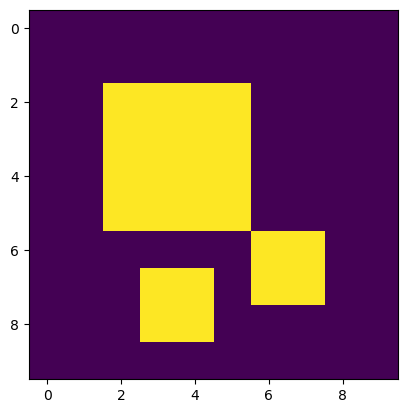

In [136]:
image = np.zeros((10, 10))
image[2:6, 2:6] = 1
image[6:8, 6:8] = 1
image[7:9, 3:5] = 1
plt.imshow(image)

In [137]:
labledImage = np.zeros_like(image)
table = {}
for r in range(image.shape[0]):
    for c in range(image.shape[1]):
        if image[r][c]:
            # U: Upper, L: Left
            UL = labledImage[r-1][c-1] if r-1 >= 0 and c-1 >= 0 else None
            U  = labledImage[r-1][c]   if r-1 >= 0              else None
            L  = labledImage[r][c-1]   if c-1 >= 0              else None
            
            if UL:  # UL exsits and not equal 0 (Not a background)
                labledImage[r][c] = UL
            elif U and not L:
                labledImage[r][c] = U
            elif L and not U:
                labledImage[r][c] = L
            elif U and L:
                labledImage[r][c] = min(U, L)
                if U != L:
                    table[max(U, L)].append(min(U, L))
            else:
                newLable = len(list(table.keys())) + 1
                labledImage[r][c] = newLable
                table[newLable] = []

newTable = {}
for r in range(image.shape[0]):
    for c in range(image.shape[1]):
        if labledImage[r][c]:
            lable = labledImage[r][c]
            while len(table[lable]):
                lable = min(table[lable])
            if lable not in newTable:
                newTable[lable] = len(newTable.keys()) + 1
            labledImage[r][c] = newTable[lable]

In [138]:
newTable = {}
for r in range(image.shape[0]):
    for c in range(image.shape[1]):
        if labledImage[r][c]:
            lable = labledImage[r][c]
            while len(table[lable]):
                lable = min(table[lable])
            if lable not in newTable:
                newTable[lable] = len(newTable.keys()) + 1
            labledImage[r][c] = newTable[lable]

[0. 1. 2.]


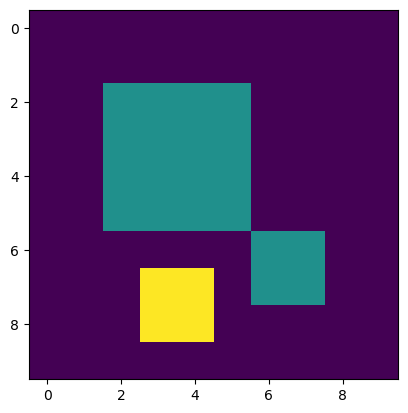

In [140]:
print(np.unique(labledImage))
plt.imshow(labledImage)